# Question 7

<h2>Question 7:</h2>
<p>In this question we are going to implement a GLM using python packages.

Linear and logistic regression are instances for a more general class of models, generalized linear models (GLMs) (McCullagh and Nelder, 1989). The idea is to use a general exponential family for the response distribution. In addition to real and binary responses, GLMs can handle categorical, positive real, positive integer, and ordinal responses.

The idea behind logistic and linear regression: The conditional expectation of yn depends
on xn through a function of a linear relationship,

In linear regression, f is the identity; in logistic regression, f is the logistic. Finally,
these methods endow yn with a distribution that depends on n. In linear regression, the
distribution is a Gaussian; in logistic regression, it is a Bernoulli.
GLMs generalize this idea with an exponential family.</p>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nyc_cyclist_counts.csv')
df = df.set_index('Date')
display(df)

,HIGH_T,LOW_T,PRECIP,BB_COUNT
Date,,,,
1-Apr-17,46.0,37.0,0.00,606
2-Apr-17,62.1,41.0,0.00,2021
3-Apr-17,63.0,50.0,0.03,2470
4-Apr-17,51.1,46.0,1.18,723
5-Apr-17,63.0,46.0,0.00,2807
...,...,...,...,...
27-Oct-17,62.1,48.0,0.00,3150
28-Oct-17,68.0,55.9,0.00,2245
29-Oct-17,64.9,61.0,3.03,183


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('BB_COUNT', axis=1), df['BB_COUNT'], test_size=0.30, random_state=42)
print(len(x_train), len(y_train), len(x_test), len(y_test))

display(x_train)
display(y_train)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

149 149 65 65


,HIGH_T,LOW_T,PRECIP
Date,,,
16-Aug-17,84.9,70.0,0.00
5-Jun-17,66.9,60.1,0.02
18-Jul-17,87.1,75.9,0.00
29-Sep-17,66.9,55.0,0.00
2-May-17,73.9,66.9,0.00
...,...,...,...
16-Jul-17,84.9,70.0,0.00
15-Apr-17,64.9,52.0,0.00
2-Jul-17,87.1,73.0,0.00


Date
16-Aug-17    3685
5-Jun-17     2171
18-Jul-17    3507
29-Sep-17    2988
2-May-17     3423
             ... 
16-Jul-17    2917
15-Apr-17    2253
2-Jul-17     2467
27-Sep-17    3216
12-Jul-17    2860
Name: BB_COUNT, Length: 149, dtype: int64

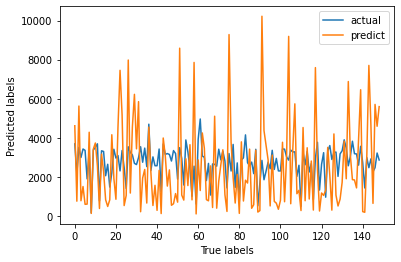

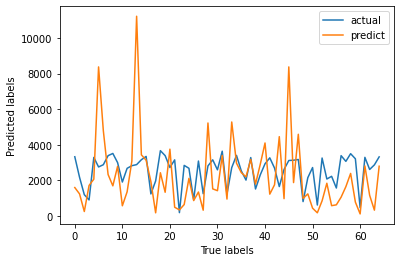

In [6]:
import numpy as np
import statsmodels.api as sm


fam = sm.families.Poisson()
glm = sm.GLM(y_train,x_train, family=fam)
res = glm.fit()

predict_test = res.predict(x_test)
predict_train = res.predict(x_train)

plt.figure()
# plt.plot(y_train, predict_train, '.')
plt.plot(y_train)
plt.plot(predict_train)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.legend(['actual', 'predict'])
# plt.plot([0, y_train.max()], [0, y_train.max()], 'r--')
plt.show()

plt.figure()
# plt.plot(y_test, predict_test, '.')
plt.plot(y_test)
plt.plot(predict_test)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.legend(['actual', 'predict'])
# plt.plot([0, y_test.max()], [0, y_test.max()], 'r--')
plt.show()

# Description

<p>In this part we tried GLM model on data that we supposed to have a poisson distribution.
We splited the data using Sklearn package into 70% train data and 30% of testing data. Then we fit the train data on our GLM model and predicted both training and testing data with that. Our target was to predict BB_COUNT column of data using other features.
We then plot the actual values in compare with predicted values for both train and test dataset. plots were drawn below.

Test Data Plot
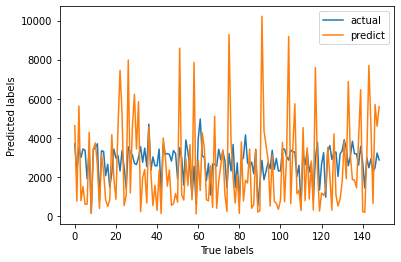
    
Train Data Plot
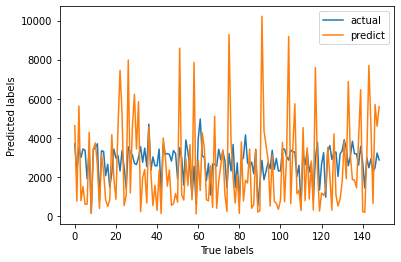

</p>

# Q8

<h2>Question 8:</h2>
<p>In this question we are going to work and Classify Iris dataset using an implemented k nearest neighbor.

We first Plot all the features in respect with one an other to better visualize the dataset and chose the best suited features in order to classify the dataset. for this purpose, we implemented the plot function. Dataset ploted using different colors for each class. Figure below shows all the plots. Since there are 4 feature then we should have 6 different plot. Class column is our target in this dataset.</p>

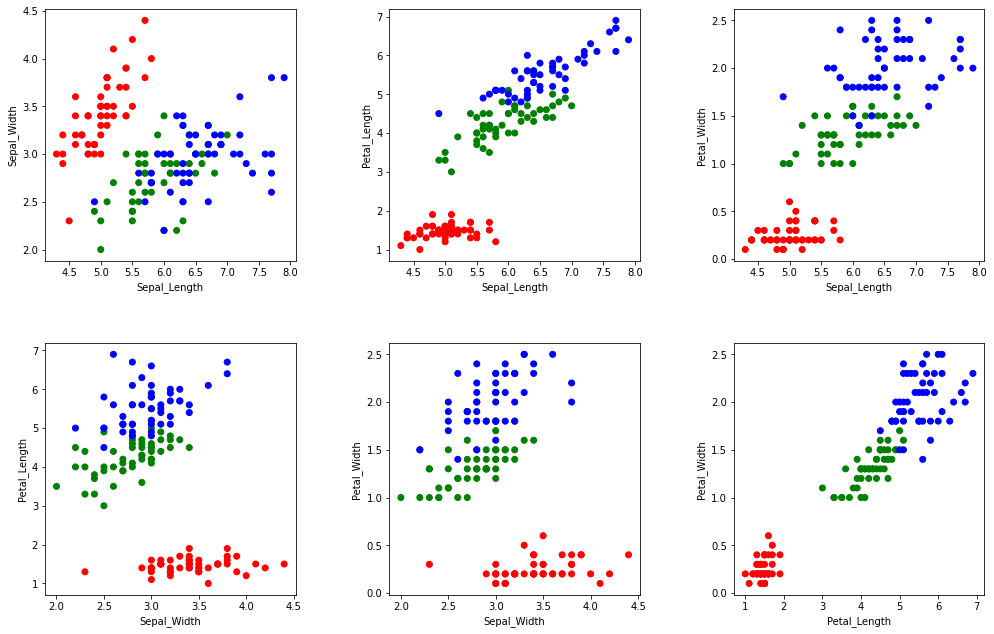

<p>As it can be seen, the more data in each class seperates from the other classes in each plot, it is more accurate to classify the data using that 2 features. In our example, the second plot in the second row <b>(Petal_Width , Sepal_Width)</b> have the loweset comon parts between classes. so it can be the best suited features to classify the dataset.</p>

In [7]:
df = pd.read_csv('iris.csv')
class_labels = df['Class']
display(df)
display(class_labels)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
class_labels = le.fit_transform(class_labels)
class_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

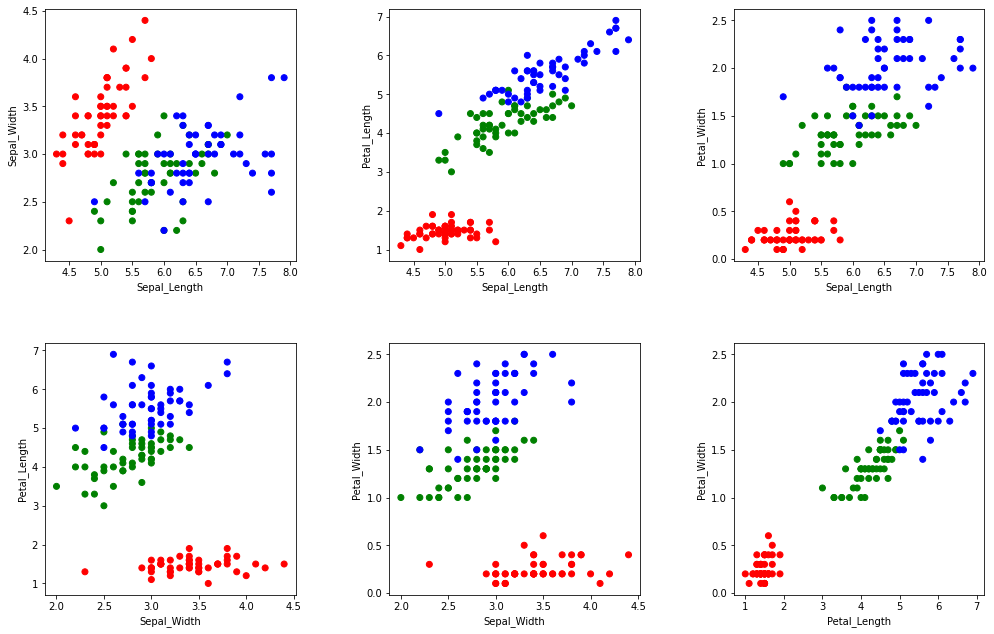

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

colors = ['red','green','blue']
df_features = df.drop('Class', axis=1)
columns = df_features.columns
fig, axs = plt.subplots(2, 3, figsize=(15,10))
matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)


axs[0, 0].scatter(df_features.iloc[:,0], df_features.iloc[:,1], c=class_labels, cmap=matplotlib.colors.ListedColormap(colors))
axs[0, 0].set_xlabel(columns[0]); axs[0, 0].set_ylabel(columns[1])

axs[0, 1].scatter(df_features.iloc[:,0], df_features.iloc[:,2], c=class_labels, cmap=matplotlib.colors.ListedColormap(colors))
axs[0, 1].set_xlabel(columns[0]); axs[0, 1].set_ylabel(columns[2])

axs[0, 2].scatter(df_features.iloc[:,0], df_features.iloc[:,3], c=class_labels, cmap=matplotlib.colors.ListedColormap(colors))
axs[0, 2].set_xlabel(columns[0]); axs[0, 2].set_ylabel(columns[3])

axs[1, 0].scatter(df_features.iloc[:,1], df_features.iloc[:,2], c=class_labels, cmap=matplotlib.colors.ListedColormap(colors))
axs[1, 0].set_xlabel(columns[1]); axs[1, 0].set_ylabel(columns[2])

axs[1, 1].scatter(df_features.iloc[:,1], df_features.iloc[:,3], c=class_labels, cmap=matplotlib.colors.ListedColormap(colors))
axs[1, 1].set_xlabel(columns[1]); axs[1, 1].set_ylabel(columns[3])

axs[1, 2].scatter(df_features.iloc[:,2], df_features.iloc[:,3], c=class_labels, cmap=matplotlib.colors.ListedColormap(colors))
axs[1, 2].set_xlabel(columns[2]); axs[1, 2].set_ylabel(columns[3])


fig.tight_layout(pad=5)

# Split the data
<p>Here we split the data to train and test with the freq of 30%, Mean our data is splited into 70% train data and 30% test data.
This is done without using any packages and samples have been chosen randomly from the iris dataset that was provided.</p>

In [10]:
# generating one row  
test_df = df.sample(frac =.3)
train_df = df.drop(test_df.index)
train_df = train_df.sample(frac=1).reset_index(drop=True)
# display(train_df)
test_df = test_df.sample(frac=1).reset_index(drop=True)
# display(test_df, len(test_df))

x_train = train_df.drop('Class', 1)
x_test = test_df.drop('Class', 1)
y_train = train_df['Class']
y_test = test_df['Class']

print(len(x_train), len(y_train), len(x_test), len(y_test))

105 105 45 45


# KNN Implementation

<p>For implementing algorithm <b>(predict_classification)</b>, we first take number neighbors <b>(get_neighbors)</b>. Then for each row the the train set we find the leaset distanced train rows to it <b>(get_neighbors)</b>. Our distance function is euclidean_distance <b>(euclidean_distance)</b>. Then we find the 5 nearest point to test data from train set and the most data with same classes in this 5 point will be our desicion of the test data.
we the evaluate the algorithm using Confusion matrix, accuracy and F1 scores <b>(plot_confusion_matrix)</b> and <b>(compute_scores)</b>.</p>

In [11]:
from random import seed
from random import randrange
import random
from csv import reader
from math import sqrt
import itertools


def split_train_test(dataset, freq): 
    test_df = [dataset.pop(random.randrange(len(dataset))) for _ in range(45)]

#     x_train = train_df.drop('Class', 1)
#     x_test = test_df.drop('Class', 1)
#     y_train = train_df['Class']
#     y_test = test_df['Class']
    
    return dataset, test_df

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

 # Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup
 
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction
 
# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

# Plot Confusion
def find_confusion_matrix(actual, predicted, normalize=False):
        unique = sorted(set(actual))
        matrix = [[0 for _ in unique] for _ in unique]
        imap   = {key: i for i, key in enumerate(unique)}
        # Generate Confusion Matrix
        for p, a in zip(predicted, actual):
            matrix[imap[p]][imap[a]] += 1
        # Matrix Normalization
        if normalize:
            sigma = sum([sum(matrix[imap[i]]) for i in unique])
            matrix = [row for row in map(lambda i: list(map(lambda j: j / sigma, i)), matrix)]
        plot_confusion_matrix(matrix, ['setosa', 'versicolor', 'virginica'])
        return matrix

    
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    cm = np.array(cm)
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

def compute_precision(tp, fp):
    return (tp  * 100)/ float( tp + fp)
    
def compute_accuracy(tp, tn, fn, fp):
    return ((tp + tn) * 100)/ float( tp + tn + fn + fp)

def compute_recall(tp, fn):
    return (tp  * 100)/ float( tp + fn)

def compute_tp_tn_fn_fp(confusion_matrix):
    confusion_matrix = np.array(confusion_matrix)
    fp = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    fn = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    tp = np.diag(confusion_matrix)
    tn = confusion_matrix.sum() - (fp + fn + tp)
    return tp, tn, fp, fn

def compute_scores(confusion_matrix):
    # calculates the F1 score
    tp, tn, fp, fn = compute_tp_tn_fn_fp(confusion_matrix)
    
    for i in range(3): 
        accuracy = compute_accuracy(tp[i], tn[i], fn[i], fp[i])
        precision = compute_precision(tp[i], fp[i])/100
        recall = compute_recall(tp[i], fn[i])/100
        f1_score = (2*precision*recall)/ (precision + recall)
        
        print("Class Number : ", i, " Accuracy score : ", accuracy, " F1 Score : ", f1_score)
        print()
        
    print("Total Accuracy: ",sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix))
    
# Evaluate the classifer by finding confusion matrix and f1, accuracy scores for each class
def evaluate(actual, predicted):
    matrix = find_confusion_matrix(actual, predicted)
    compute_scores(matrix)

def evaluate_algorithm_second(dataset, algorithm, n_folds, *args):
    train_set, test_set = split_train_test(dataset, 0.3)
    
    predicted = algorithm(train_set, test_set, *args)
    actual = [row[-1] for row in test_set]
    
    evaluate(actual, predicted)
    return 0;
    

# Description
<p>To use the implemented KNN classifier, we first change types of all coulmns to float and our target column which is the class label to int.
Then we can normilize the dataset using min max normilization. Here we did 2 classifeir one using normalization and the other without any normilization.
In this classifeir we used 5 neighbors to classify each data as its k value. we then plot confusion matrix and calculate accuracy and f1 scores for each class.</p>


<h3>result of using normalization for the dataset</h3>

Accuracy is : 88% <br>

F1 scores: <br>
Class 1: 0.8275862068965518 <br>
Class 2: 1.0 <br>
Class 3: 0.8275862068965518 <br>

Confusion matrix:
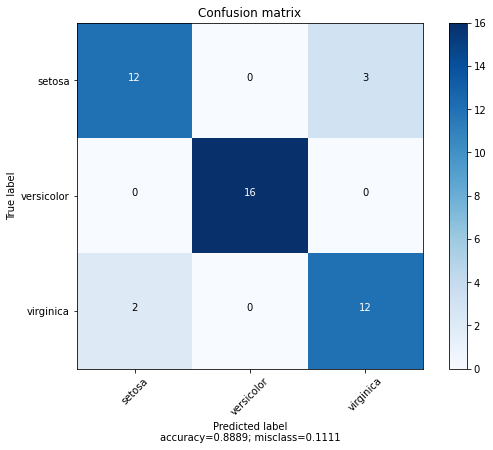

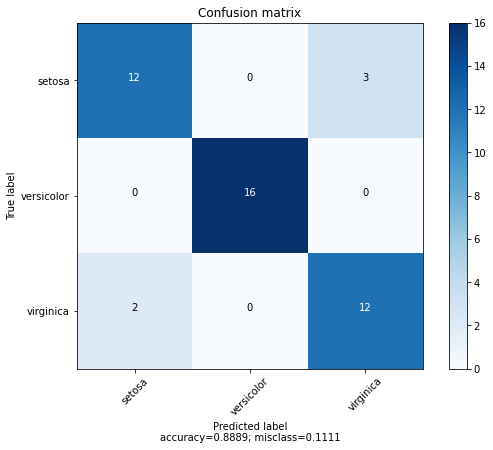

Class Number :  0  Accuracy score :  88.88888888888889  F1 Score :  0.8275862068965518

Class Number :  1  Accuracy score :  100.0  F1 Score :  1.0

Class Number :  2  Accuracy score :  88.88888888888889  F1 Score :  0.8275862068965518

Total Accuracy:  0.8888888888888888


0

In [14]:
# Test the kNN on the Iris Flowers dataset
seed(1)
filename = 'iris.csv'
dataset = load_csv(filename)

column_names = dataset[0]
del dataset[0]
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)

# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)

normalize_dataset(dataset, dataset_minmax(dataset))


# evaluate algorithm
n_folds = 5
num_neighbors = 5
evaluate_algorithm_second(dataset, k_nearest_neighbors, n_folds, num_neighbors)


<h3>result of without normalization for the dataset</h3>

Accuracy is : 97% <br>

F1 scores: <br>
Class 1: 0.962962962962963 <br>
Class 2: 1.0 <br>
Class 3: 0.967741935483871 <br>

Confusion matrix:
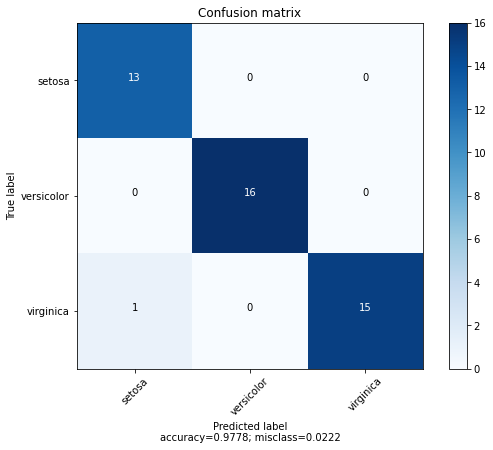

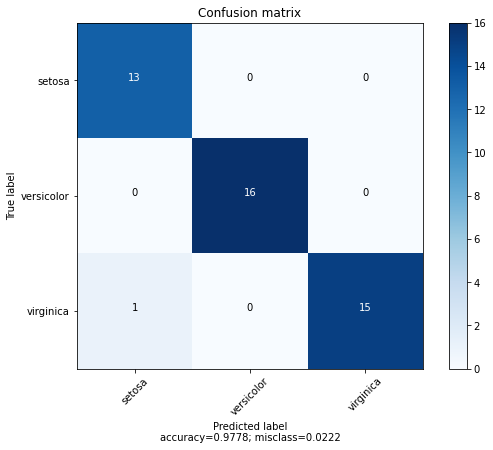

Class Number :  0  Accuracy score :  97.77777777777777  F1 Score :  0.962962962962963

Class Number :  1  Accuracy score :  100.0  F1 Score :  1.0

Class Number :  2  Accuracy score :  97.77777777777777  F1 Score :  0.967741935483871

Total Accuracy:  0.9777777777777777


0

In [16]:
# Test the kNN on the Iris Flowers dataset
seed(1)
filename = 'iris.csv'
dataset = load_csv(filename)

column_names = dataset[0]
del dataset[0]
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)

# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)

# evaluate algorithm
n_folds = 5
num_neighbors = 5
evaluate_algorithm_second(dataset, k_nearest_neighbors, n_folds, num_neighbors)


# Normalization vs no Normalization

<p>As it was seen, The accuracy and scores of classifing without normalization was higher. The difference between accuracies are <b>97 - 88 = 9%</b></p>

In [17]:

df = pd.read_csv('iris.csv')

y = df['Class']
X = df.drop('Class', axis=1)

print(list(set(y)))

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']


# using Python Package

<p>Here we will implement the KNN classifier using sklearn package, Here we splited the data, Normalize it and fit it to the classifeir. Then we predicted the test dataset using same classifeir and evaluat it by plotting confusion matrix, calculating accuracy and f1 scores for each class, and plotting ROC for each 2 class individually and calcualted the AUC (Area under Curve) to compare each class with others</p>

<h3>Result of using implemented python packages are:</h3>

|    | precision | recall | f1-score | support |
| --- | --- | --- | --- | --- |
| Iris-setosa | 1.00 | 1.00 | 1.00 | 18 |
| Iris-versicolor | 0.88 | 0.88 | 0.88 | 16
| Iris-virginica | 0.88 | 0.88 | 0.88 | 16

Accuracy is : 92%

   
confusion matrix is:
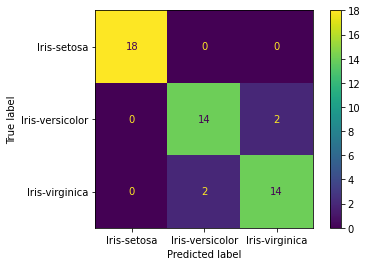



ROC Plot is:
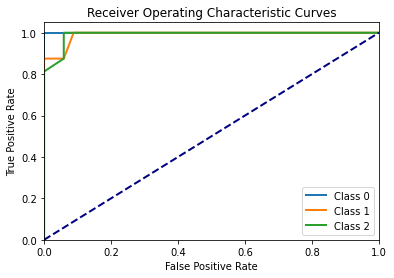

And AUC for each class calculated as: <br>
AUC for Class 1: 1.0 <br>
AUC for Class 2: 0.9908088235294117 <br>
AUC for Class 3: 0.9908088235294118 <br>


All This was coded with Implemented python packages. <br>

100 100 50 50
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.88      0.88      0.88        16
 Iris-virginica       0.88      0.88      0.88        16

       accuracy                           0.92        50
      macro avg       0.92      0.92      0.92        50
   weighted avg       0.92      0.92      0.92        50



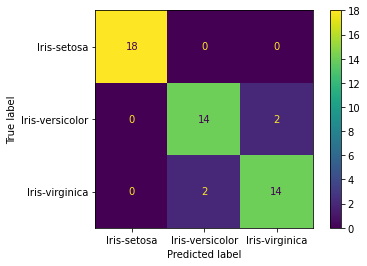

AUC for Class 1: 1.0
AUC for Class 2: 0.9908088235294117
AUC for Class 3: 0.9908088235294118


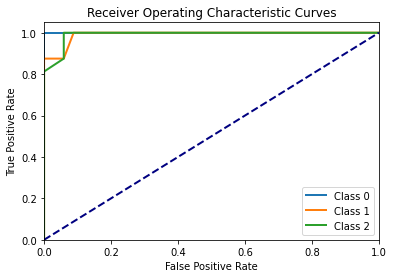

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer


df = pd.read_csv('iris.csv')


y = df['Class']
X = df.drop('Class', axis=1)


# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(len(X_train), len(y_train), len(X_test), len(y_test))

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

y_pred = neigh.predict(X_test)

print(classification_report(y_test, y_pred, target_names=list(set(y))))
plot_confusion_matrix(neigh, X_test, y_test)
plt.show()

#Calculate the y_score
y_score = neigh.predict_proba(X_test)
#Binarize the output
y_test_bin = LabelBinarizer().fit_transform(y_test)
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

legend_plot = []
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2)
    legend_plot.append("Class " + str(i))
    print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(legend_plot)
plt.show()

# Q9

# Optimal Bayes vs Naive Bayes

<p>The Optimal Bayes classifier chooses the class that has greatest a posteriori probability of occurrence (so called maximum a posteriori estimation, or MAP). It can be shown that of all classifiers, the Optimal Bayes classifier is the one that will have the lowest probability of miss classifying an observation, i.e. the lowest probability of error. So if we know the posterior distribution, then using the Bayes classifier is as good as it gets.

In real-life we usually do not know the posterior distribution, but rather we estimate it. The Naive Bayes classifier approximates the optimal Bayes classifier by looking at the empirical distribution and by assuming independence of predictors. So the Naive Bayes classifier is not itself optimal, but it approximates the optimal solution.</p>

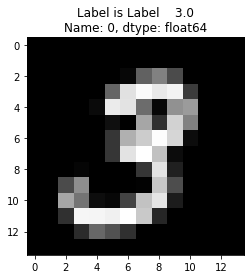

In [292]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

X_train = pd.read_csv('TinyMNIST/trainData.csv')
X_test = pd.read_csv('TinyMNIST/testData.csv')
y_train = pd.read_csv('TinyMNIST/trainLabels.csv')
y_test = pd.read_csv('TinyMNIST/testLabels.csv')

y_train.columns = ['Label']
y_test.columns = ['Label']

temp = list(range(0, 196))
X_train.columns = temp
X_test.columns = temp

# print(y_train)
# print(X_train)

for index in range(len(X_train)):
    # The first column is the label
    label = y_train.loc[index]

    # The rest of columns are pixels
    pixels = X_train.loc[index]

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = np.array(pixels, dtype='float64')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((14, 14))

    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

    break # This stops the loop, I just want to see one

# Impliment Bayes

In [293]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input


import itertools
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

class Bayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = dict()
        self.priors = dict()
        self.uniqe_labels = np.unique(Y)
        labels = np.unique(Y)
        for c in labels:
            labeling = Y == c
            index = labeling[labeling['Label'] == True].index.tolist()
            current_x = X.loc[index]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'cov': np.cov(current_x.T) + np.eye(D)*smoothing,
            }
            labeling = y_train == c
            index = labeling[labeling['Label'] == True].index.tolist()
            self.priors[c] = float(len(index)) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        Y_array = np.array(Y)
        Y_array = Y_array.reshape(Y_array.shape[0],).astype(int)
             
        self.compute_scores(self.find_confusion_matrix(Y_array, P))
        
        return np.mean(P == Y_array)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in iteritems(self.gaussians):
            mean, cov = g['mean'], g['cov']
            P[:, int(c)] = mvn.logpdf(X, mean=mean, cov=cov) + np.log(self.priors[c])
        return np.argmax(P, axis=1)
    
        # Plot Confusion
    def find_confusion_matrix(self, actual, predicted, normalize=False):
            unique = sorted(set(actual))
            matrix = [[0 for _ in unique] for _ in unique]
            imap   = {key: i for i, key in enumerate(unique)}
            # Generate Confusion Matrix
            for p, a in zip(predicted, actual):
                matrix[imap[p]][imap[a]] += 1
            # Matrix Normalization
            if normalize:
                sigma = sum([sum(matrix[imap[i]]) for i in unique])
                matrix = [row for row in map(lambda i: list(map(lambda j: j / sigma, i)), matrix)]
            self.plot_confusion_matrix(matrix, unique)
            return matrix


    def plot_confusion_matrix(self, cm,
                              target_names,
                              title='Confusion matrix',
                              cmap=None,
                              normalize=False):
        cm = np.array(cm)
        accuracy = np.trace(cm) / float(np.sum(cm))
        misclass = 1 - accuracy

        if cmap is None:
            cmap = plt.get_cmap('Blues')

        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45)
            plt.yticks(tick_marks, target_names)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")


        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
        plt.show()
    
    def compute_precision(self, tp, fp):
        return (tp  * 100)/ float( tp + fp)
    
    def compute_accuracy(self, tp, tn, fn, fp):
        return ((tp + tn) * 100)/ float( tp + tn + fn + fp)

    def compute_recall(self, tp, fn):
        return (tp  * 100)/ float( tp + fn)

    def compute_tp_tn_fn_fp(self, confusion_matrix):
        confusion_matrix = np.array(confusion_matrix)
        fp = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
        fn = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
        tp = np.diag(confusion_matrix)
        tn = confusion_matrix.sum() - (fp + fn + tp)
        return tp, tn, fp, fn

    def compute_scores(self, confusion_matrix):
        # calculates the F1 score
        tp, tn, fp, fn = self.compute_tp_tn_fn_fp(confusion_matrix)

        for i in range(len(self.uniqe_labels)): 
            accuracy = self.compute_accuracy(tp[i], tn[i], fn[i], fp[i])
            precision = self.compute_precision(tp[i], fp[i])/100
            recall = self.compute_recall(tp[i], fn[i])/100
            f1_score = (2*precision*recall)/ (precision + recall)

            print("Class Number : ", i, " Accuracy score : ", accuracy, " F1 Score : ", f1_score)
            print()

        print("Total Accuracy: ",sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix))



# Impliment Naive Bayes

# Naive Bayes

In [294]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input


import numpy as np
import itertools
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

class NaiveBayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        self.gaussians = dict()
        self.priors = dict()
        self.uniqe_labels = np.unique(Y)
        labels = np.unique(Y)
        
        for c in labels:
            labeling = Y == c
            index = labeling[labeling['Label'] == True].index.tolist()
            current_x = X.loc[index]
            
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            labeling = y_train == c
            index = labeling[labeling['Label'] == True].index.tolist()
            self.priors[c] = float(len(index)) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        Y_array = np.array(Y)
        Y_array = Y_array.reshape(Y_array.shape[0],).astype(int)
             
        self.compute_scores(self.find_confusion_matrix(Y_array, P))
        
        return np.mean(P == Y_array)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in iteritems(self.gaussians):
            mean, var = g['mean'], g['var']
            P[:,int(c)] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])
        return np.argmax(P, axis=1)
            # Plot Confusion
    def find_confusion_matrix(self, actual, predicted, normalize=False):
            unique = sorted(set(actual))
            matrix = [[0 for _ in unique] for _ in unique]
            imap   = {key: i for i, key in enumerate(unique)}
            # Generate Confusion Matrix
            for p, a in zip(predicted, actual):
                matrix[imap[p]][imap[a]] += 1
            # Matrix Normalization
            if normalize:
                sigma = sum([sum(matrix[imap[i]]) for i in unique])
                matrix = [row for row in map(lambda i: list(map(lambda j: j / sigma, i)), matrix)]
            self.plot_confusion_matrix(matrix, unique)
            return matrix


    def plot_confusion_matrix(self, cm,
                              target_names,
                              title='Confusion matrix',
                              cmap=None,
                              normalize=False):
        cm = np.array(cm)
        accuracy = np.trace(cm) / float(np.sum(cm))
        misclass = 1 - accuracy

        if cmap is None:
            cmap = plt.get_cmap('Blues')

        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45)
            plt.yticks(tick_marks, target_names)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")


        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
        plt.show()
    
    def compute_precision(self, tp, fp):
        return (tp  * 100)/ float( tp + fp)
    
    def compute_accuracy(self, tp, tn, fn, fp):
        return ((tp + tn) * 100)/ float( tp + tn + fn + fp)

    def compute_recall(self, tp, fn):
        return (tp  * 100)/ float( tp + fn)

    def compute_tp_tn_fn_fp(self, confusion_matrix):
        confusion_matrix = np.array(confusion_matrix)
        fp = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
        fn = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
        tp = np.diag(confusion_matrix)
        tn = confusion_matrix.sum() - (fp + fn + tp)
        return tp, tn, fp, fn

    def compute_scores(self, confusion_matrix):
        # calculates the F1 score
        tp, tn, fp, fn = self.compute_tp_tn_fn_fp(confusion_matrix)

        for i in range(len(self.uniqe_labels)): 
            accuracy = self.compute_accuracy(tp[i], tn[i], fn[i], fp[i])
            precision = self.compute_precision(tp[i], fp[i])/100
            recall = self.compute_recall(tp[i], fn[i])/100
            f1_score = (2*precision*recall)/ (precision + recall)

            print("Class Number : ", i, " Accuracy score : ", accuracy, " F1 Score : ", f1_score)
            print()

        print("Total Accuracy: ",sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix))


# Description

<p>Here We used the implimented Bayes and Naive Bayes Classifeir for 2 Different dataset. We then evaluate our classifier by plotting the confusion matrix and calculate accuracy. and F1 scores for each class.</p>

<h3>Result of Each Classifeir are Shown Below</h3>

<h3>Result of Bayes Classifier on Tiny MNIST dataset</h3>

Training time: 0:00:00.069926


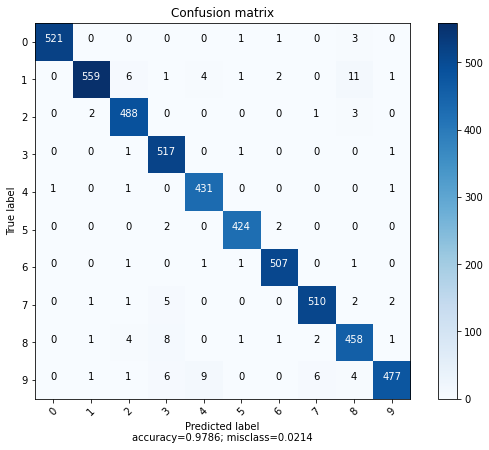

Class Number :  0  Accuracy score :  99.87997599519905  F1 Score :  0.9942748091603053

Class Number :  1  Accuracy score :  99.37987597519503  F1 Score :  0.9730200174064404

Class Number :  2  Accuracy score :  99.57991598319664  F1 Score :  0.9789368104312939

Class Number :  3  Accuracy score :  99.499899979996  F1 Score :  0.9763928234183192

Class Number :  4  Accuracy score :  99.65993198639728  F1 Score :  0.9806598407281001

Class Number :  5  Accuracy score :  99.81996399279856  F1 Score :  0.9894982497082847

Class Number :  6  Accuracy score :  99.7999599919984  F1 Score :  0.9902343749999999

Class Number :  7  Accuracy score :  99.5999199839968  F1 Score :  0.9807692307692307

Class Number :  8  Accuracy score :  99.15983196639328  F1 Score :  0.9561586638830898

Class Number :  9  Accuracy score :  99.33986797359472  F1 Score :  0.966565349544073

Total Accuracy:  0.9785957191438288
Train accuracy: 0.9785957191438288
Time to compute train accuracy: 0:00:00.962358 Train s

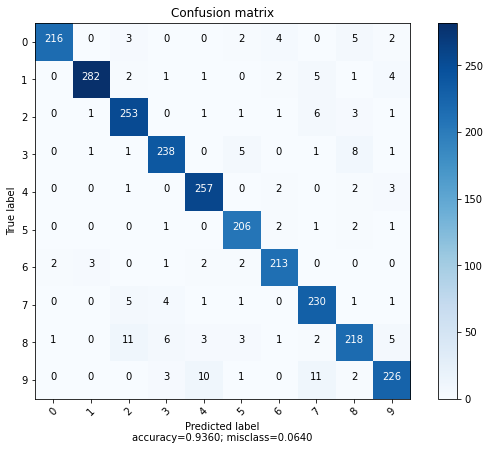

Class Number :  0  Accuracy score :  99.23969587835134  F1 Score :  0.9578713968957872

Class Number :  1  Accuracy score :  99.15966386554622  F1 Score :  0.9641025641025642

Class Number :  2  Accuracy score :  98.51940776310524  F1 Score :  0.9318600368324125

Class Number :  3  Accuracy score :  98.67947178871549  F1 Score :  0.9351669941060903

Class Number :  4  Accuracy score :  98.95958383353342  F1 Score :  0.9518518518518517

Class Number :  5  Accuracy score :  99.11964785914365  F1 Score :  0.9493087557603686

Class Number :  6  Accuracy score :  99.11964785914365  F1 Score :  0.9508928571428572

Class Number :  7  Accuracy score :  98.43937575030012  F1 Score :  0.9218436873747494

Class Number :  8  Accuracy score :  97.75910364145658  F1 Score :  0.8861788617886179

Class Number :  9  Accuracy score :  98.19927971188476  F1 Score :  0.9094567404426559

Total Accuracy:  0.9359743897559024
Test accuracy: 0.9359743897559024
Time to compute test accuracy: 0:00:00.831686 Test

In [295]:
model = Bayes()
t0 = datetime.now()
model.fit(X_train, y_train)
print("Training time:", (datetime.now() - t0))

t0 = datetime.now()
print("Train accuracy:", model.score(X_train, y_train))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(y_train))

t0 = datetime.now()
print("Test accuracy:", model.score(X_test, y_test))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(y_test))

<h3>Result of Naive Bayes Classifier on Tiny MNIST dataset</h3>

Training time: 0:00:00.046846


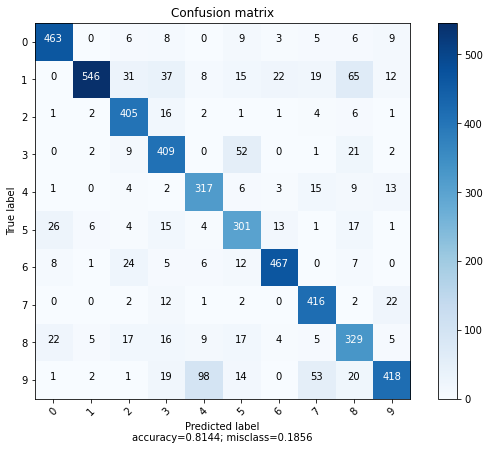

Class Number :  0  Accuracy score :  97.8995799159832  F1 Score :  0.8981571290009699

Class Number :  1  Accuracy score :  95.45909181836367  F1 Score :  0.8278999241849887

Class Number :  2  Accuracy score :  97.35947189437887  F1 Score :  0.8598726114649682

Class Number :  3  Accuracy score :  95.65913182636527  F1 Score :  0.7903381642512076

Class Number :  4  Accuracy score :  96.37927585517103  F1 Score :  0.7779141104294479

Class Number :  5  Accuracy score :  95.6991398279656  F1 Score :  0.7368421052631579

Class Number :  6  Accuracy score :  97.81956391278256  F1 Score :  0.8954937679769895

Class Number :  7  Accuracy score :  97.11942388477695  F1 Score :  0.8524590163934426

Class Number :  8  Accuracy score :  94.9389877975595  F1 Score :  0.7222832052689352

Class Number :  9  Accuracy score :  94.53890778155632  F1 Score :  0.7538322813345357

Total Accuracy:  0.8143628725745149
Train accuracy: 0.8143628725745149
Time to compute train accuracy: 0:00:00.887732 Train

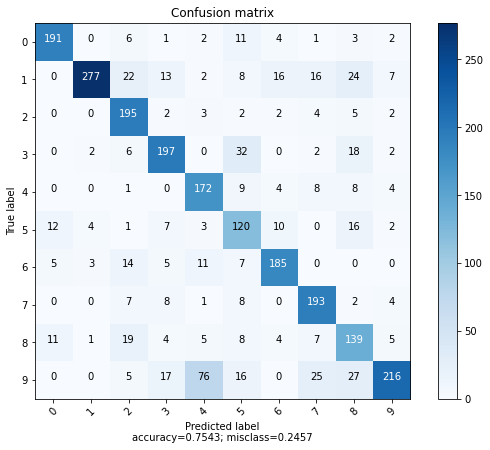

Class Number :  0  Accuracy score :  97.67907162865146  F1 Score :  0.8681818181818182

Class Number :  1  Accuracy score :  95.2781112444978  F1 Score :  0.8244047619047619

Class Number :  2  Accuracy score :  95.95838335334133  F1 Score :  0.7942973523421588

Class Number :  3  Accuracy score :  95.23809523809524  F1 Score :  0.7680311890838205

Class Number :  4  Accuracy score :  94.51780712284913  F1 Score :  0.7151767151767151

Class Number :  5  Accuracy score :  93.75750300120048  F1 Score :  0.606060606060606

Class Number :  6  Accuracy score :  96.59863945578232  F1 Score :  0.8131868131868132

Class Number :  7  Accuracy score :  96.27851140456183  F1 Score :  0.8058455114822547

Class Number :  8  Accuracy score :  93.31732693077231  F1 Score :  0.6247191011235955

Class Number :  9  Accuracy score :  92.23689475790316  F1 Score :  0.6900958466453673

Total Accuracy:  0.7543017206882753
Test accuracy: 0.7543017206882753
Time to compute test accuracy: 0:00:00.808065 Test s

In [229]:
model = NaiveBayes()
t0 = datetime.now()
model.fit(X_train, y_train)
print("Training time:", (datetime.now() - t0))

t0 = datetime.now()
print("Train accuracy:", model.score(X_train, y_train))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(y_train))

t0 = datetime.now()
print("Test accuracy:", model.score(X_test, y_test))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(y_test))

# Compare Results of Bayes and Optimal Bayes


<p>Acuracy in Optimal Bayes is : 0.9359743897559024</p>
<p>Acuracy in Naive Bayes is : 0.7543017206882753</p>

<p>As it is seen accuracy of Optimal Bayes is greater. It could have been predicted since we know optimal bayes always finds optimal answer with greated computational time, but naive bayes always tries to find optimal solution but it is not guarantee to be the global optimal answer.</p>

In [230]:
import numpy
import pandas
import random

df = pd.read_csv('Noisy Moons.csv')

df = df.rename(columns={'3.560705892206281198e-01': '1', '9.009692256043324576e-01': '2', '0.000000000000000000e+00': 'Label'})

test_df = df.sample(int(len(df) * 0.3))
train_df = df.drop(test_df.index)

test_df = test_df.reset_index().drop('index', axis = 1)
train_df = train_df.reset_index().drop('index', axis = 1)


y_train = pd.DataFrame(train_df['Label'], columns= ['Label'])
X_train = train_df.drop('Label', axis=1)

y_test = pd.DataFrame(test_df['Label'], columns= ['Label'])
X_test = test_df.drop('Label', axis=1)

print(len(y_test), len(y_train))

149 350


<h3>Result of Bayes Classifier on Noisy Moons dataset</h3>

Training time: 0:00:00.007755


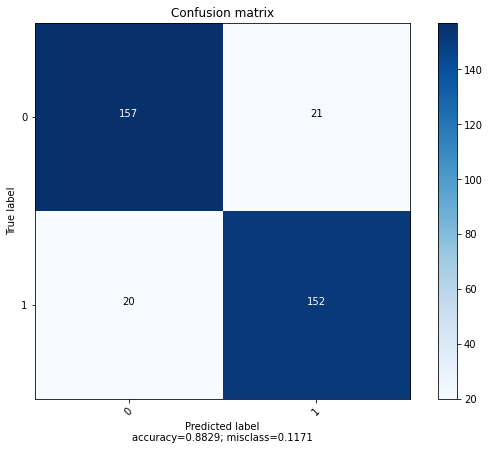

Class Number :  0  Accuracy score :  88.28571428571429  F1 Score :  0.8845070422535212

Class Number :  1  Accuracy score :  88.28571428571429  F1 Score :  0.881159420289855

Total Accuracy:  0.8828571428571429
Train accuracy: 0.8828571428571429
Time to compute train accuracy: 0:00:00.188703 Train size: 350


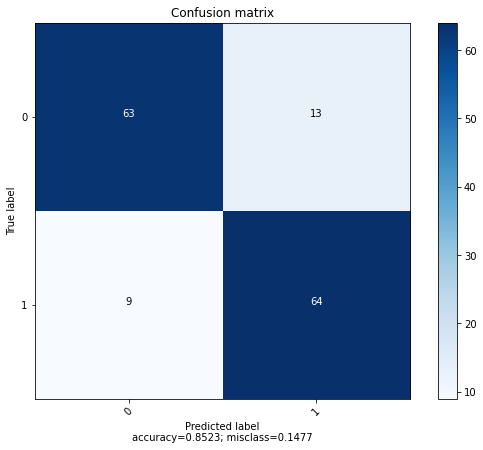

Class Number :  0  Accuracy score :  85.23489932885906  F1 Score :  0.8513513513513513

Class Number :  1  Accuracy score :  85.23489932885906  F1 Score :  0.8533333333333333

Total Accuracy:  0.8523489932885906
Test accuracy: 0.8523489932885906
Time to compute test accuracy: 0:00:00.208108 Test size: 149


In [231]:
model = Bayes()
t0 = datetime.now()
model.fit(X_train, y_train)
print("Training time:", (datetime.now() - t0))

t0 = datetime.now()
print("Train accuracy:", model.score(X_train, y_train))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(y_train))

t0 = datetime.now()
print("Test accuracy:", model.score(X_test, y_test))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(y_test))

<h3>Result of Naive Bayes Classifier on Noisy Moons dataset</h3>

Training time: 0:00:00.004988


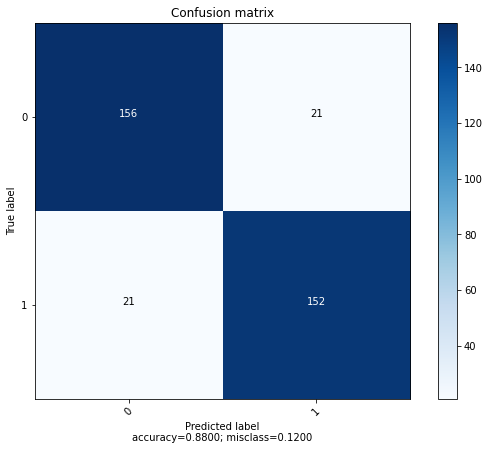

Class Number :  0  Accuracy score :  88.0  F1 Score :  0.8813559322033898

Class Number :  1  Accuracy score :  88.0  F1 Score :  0.8786127167630058

Total Accuracy:  0.88
Train accuracy: 0.88
Time to compute train accuracy: 0:00:00.189478 Train size: 350


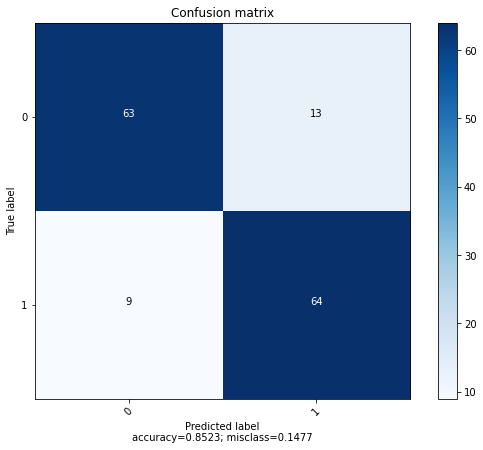

Class Number :  0  Accuracy score :  85.23489932885906  F1 Score :  0.8513513513513513

Class Number :  1  Accuracy score :  85.23489932885906  F1 Score :  0.8533333333333333

Total Accuracy:  0.8523489932885906
Test accuracy: 0.8523489932885906
Time to compute test accuracy: 0:00:00.179717 Test size: 149


In [232]:
model = NaiveBayes()
t0 = datetime.now()
model.fit(X_train, y_train)
print("Training time:", (datetime.now() - t0))

t0 = datetime.now()
print("Train accuracy:", model.score(X_train, y_train))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(y_train))

t0 = datetime.now()
print("Test accuracy:", model.score(X_test, y_test))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(y_test))

# Implimented Python Packages

<p>Here we Impliment Navie Bayes Gaussuan Classifer for both datasets and compare results</p>

<h3>Result of Naive Bayes Classifier on Tiny MNIST dataset</h3>

[7. 2. 1. ... 9. 4. 4.]
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       219
         1.0       0.53      0.97      0.69       287
         2.0       0.80      0.26      0.40       276
         3.0       0.75      0.24      0.37       254
         4.0       0.77      0.28      0.41       275
         5.0       0.83      0.07      0.13       221
         6.0       0.62      0.80      0.70       225
         7.0       0.86      0.23      0.37       257
         8.0       0.25      0.58      0.35       242
         9.0       0.39      0.84      0.53       244

    accuracy                           0.51      2500
   macro avg       0.66      0.51      0.47      2500
weighted avg       0.66      0.51      0.47      2500



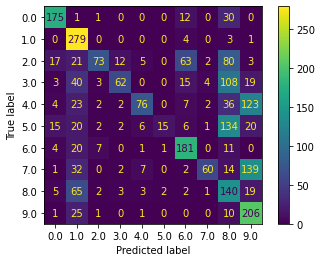

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       522
         1.0       0.56      0.97      0.71       564
         2.0       0.93      0.40      0.56       503
         3.0       0.78      0.33      0.46       539
         4.0       0.85      0.39      0.53       445
         5.0       0.85      0.10      0.17       429
         6.0       0.77      0.90      0.83       513
         7.0       0.91      0.32      0.47       520
         8.0       0.27      0.62      0.38       482
         9.0       0.44      0.81      0.57       483

    accuracy                           0.58      5000
   macro avg       0.72      0.57      0.55      5000
weighted avg       0.72      0.58      0.56      5000



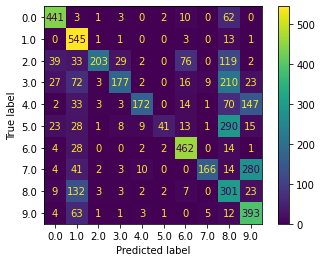

In [285]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train = pd.read_csv('TinyMNIST/trainData.csv', header=None, dtype=str)
X_test = pd.read_csv('TinyMNIST/testData.csv', header=None, dtype=str)
y_train = pd.read_csv('TinyMNIST/trainLabels.csv', header=None, dtype=str)
y_test = pd.read_csv('TinyMNIST/testLabels.csv', header=None, dtype=str)

y_train.columns = ['Label']
y_test.columns = ['Label']

y_test = np.array(y_test).reshape(y_test.shape[0],).astype(float)
y_train = np.array(y_train).reshape(y_train.shape[0],).astype(float)

temp = list(range(0, 196))
X_train.columns = temp
X_test.columns = temp

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

names = np.unique(y_train).astype('str')

print(classification_report(y_test, y_pred_test, target_names=names))
plot_confusion_matrix(clf, X_test, y_test)
plt.show()


print(classification_report(y_train, y_pred_train, target_names=names))
plot_confusion_matrix(clf, X_train, y_train)
plt.show()

<h3>Result of Naive Bayes Classifier on Noisy Moons dataset</h3>

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90        85
         1.0       0.88      0.86      0.87        65

    accuracy                           0.89       150
   macro avg       0.89      0.88      0.88       150
weighted avg       0.89      0.89      0.89       150



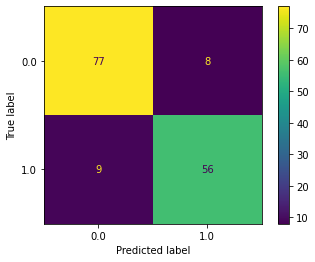

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       165
         1.0       0.88      0.88      0.88       185

    accuracy                           0.87       350
   macro avg       0.87      0.87      0.87       350
weighted avg       0.87      0.87      0.87       350



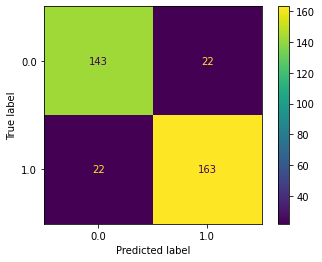

In [286]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv('Noisy Moons.csv', header=None,dtype=str)
df.columns = ['1', '2', 'Label']

test_df = df.sample(int(len(df) * 0.3))
train_df = df.drop(test_df.index)

test_df = test_df.reset_index().drop('index', axis = 1)
train_df = train_df.reset_index().drop('index', axis = 1)


y_train = pd.DataFrame(train_df['Label'], columns= ['Label']).astype(float)
X_train = train_df.drop('Label', axis=1)

y_test = pd.DataFrame(test_df['Label'], columns= ['Label']).astype(float)
X_test = test_df.drop('Label', axis=1)

y_test = np.array(y_test).reshape(y_test.shape[0],)
y_train = np.array(y_train).reshape(y_train.shape[0],)

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

names = np.unique(y_train).astype('str')

print(classification_report(y_test, y_pred_test, target_names=names))
plot_confusion_matrix(clf, X_test, y_test)
plt.show()


print(classification_report(y_train, y_pred_train, target_names=names))
plot_confusion_matrix(clf, X_train, y_train)
plt.show()

# Q10

# One vs Rest Classifier

<p>One-vs.-rest strategy involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. This strategy requires the base classifiers to produce a real-valued confidence score for its decision, rather than just a class label; discrete class labels alone can lead to ambiguities, where multiple classes are predicted for a single sample.</p>

# Implement Logistic Regression

<p>Here We used a Sigmoid Function in order to do the One vs All strategy. We First Train a Logistic Regression for each class and then Calcualte the probility of each classifeir for each test data. Then a Signmoid function will be called on this probilities to find the most suited class. Our decision will be that class.</p>

<p>As a Logistic Regression gradient decent is used in order to minimize the cost fucntion each itiration. our cost function here ic cross entropy.</p>

# Cost Fucniton Cross Entropy

<p>we can’t (or at least shouldn’t) use the same cost function MSE (L2) as we did for linear regression. it’s because our prediction function is non-linear (due to sigmoid transform). Squaring this prediction as we do in MSE results in a non-convex function with many local minimums. If our cost function has many local minimums, gradient descent may not find the optimal global minimum.</p>

<p>Instead of Mean Squared Error, we use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for y=1 and one for y=0.</p>

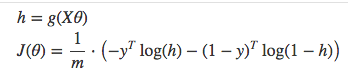


<p>The benefits of taking the logarithm reveal themselves when you look at the cost function graphs for y=1 and y=0. These smooth monotonic functions (always increasing or always decreasing) make it easy to calculate the gradient and minimize cost. Image from Andrew Ng’s slides on logistic regression.</p>

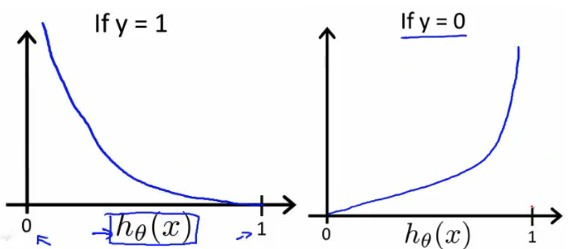

<p>The key thing to note is the cost function penalizes confident and wrong predictions more than it rewards confident and right predictions! The corollary is increasing prediction accuracy (closer to 0 or 1) has diminishing returns on reducing cost due to the logistic nature of our cost function.</p>

<b>Above functions compressed into one</b>
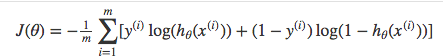

<p> Multiplying by y and (1−y) in the above equation is a sneaky trick that let’s us use the same equation to solve for both y=1 and y=0 cases. If y=0, the first side cancels out. If y=1, the second side cancels out. In both cases we only perform the operation we need to perform. </p>
<b>Vectorized cost function</b>

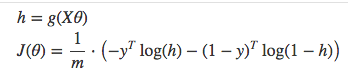

In [23]:
#We are importing all necessary libraries to implement our model
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class LogisticRegression(object):
    
    def __init__(Logreg, alpha=0.01, n_iteration=100):  #This function intializes the alpha value and iteration 
        Logreg.alpha = alpha                            #value in the object
        Logreg.n_iter = n_iteration
        
    def _sigmoid_function(Logreg, x): #This function is resonsible for calculating the sigmoid value with given parameter
        value = 1 / (1 + np.exp(-x))
        return value
    def _cost_function(Logreg,h,theta, y): # The fuctions calculates the cost value
        m = len(y)
        cost = (1 / m) * (np.sum(-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))))
        return cost
    
    def _gradient_descent(Logreg,X,h,theta,y,m): # This function calculates the theta value by gradient descent
        gradient_value = np.dot(X.T, (h - y)) / m
        theta -= Logreg.alpha * gradient_value
        return theta
    
    def fit(Logreg, X, y): #This function primarily calculates the optimal theta value using which we predict the future data
        print("Fitting the given dataset..")
        Logreg.theta = []
        Logreg.cost = []
        X = np.insert(X, 0, 1, axis=1)
        m = len(y)
        for i in np.unique(y): 
            print('Descending the gradient for label type ' + str(i) + 'vs Rest')
            y_onevsall = np.where(y == i, 1, 0)
            y_onevsall = y_onevsall.reshape(y_onevsall.shape[0],)
            theta = np.zeros(X.shape[1])
            cost = []
            for _ in range(Logreg.n_iter):
                z = X.dot(theta)
                h = Logreg._sigmoid_function(z)
                theta = Logreg._gradient_descent(X,h,theta,y_onevsall,m)
                cost.append(Logreg._cost_function(h,theta,y_onevsall)) 
            Logreg.theta.append((theta, i))
            Logreg.cost.append((cost,i))
        return Logreg

    def predict(Logreg, X): # this function calls the max predict function to classify the individul feauter
        X = np.insert(X, 0, 1, axis=1)
        X_predicted = [max((Logreg._sigmoid_function(i.dot(theta)), c) for theta, c in Logreg.theta)[1] for i in X ]

        return X_predicted

    def score(Logreg,X, y): #This function compares the predictd label with the actual label to find the model performance
        y_pred = Logreg.predict(X)
        y_true = y.reshape(y.shape[0],)
        score = sum(y_pred == y_true) / len(y_true)
        return score
    
    def _plot_cost(Logreg,costh): # This function plot the Cost function value
        for cost,c in costh   :
                plt.plot(range(len(cost)),cost,'r')
                plt.title("Convergence Graph of Cost Function of type-" + str(c) +" vs All")
                plt.xlabel("Number of Iterations")
                plt.ylabel("Cost")
                plt.show()
                
    def plot_points(Logreg, X, y):
        colors = ['red','green','blue']
        columns = X.columns
        seq = y.astype(float).astype(int)
        
        plt.figure()
        plt.scatter(X.iloc[:,0], X.iloc[:,1], c=seq, cmap=matplotlib.colors.ListedColormap(colors))
        for i in np.unique(seq):
            xt0 = np.array([0, 1])
            f = lambda x_1: (Logreg.theta[i][0][0] + Logreg.theta[i][0][2] * x_1) / Logreg.theta[i][0][1]
            yt0 = f(xt0)
            plt.plot(xt0, yt0, color = colors[i])
        plt.show()
                

# Description
<p>Here We use the implimented Logstic Regression to Classify Random_Dataset. Normalization is done before the classifying to increase the accuracy of the classifier. It is then Splited into Test and Train for evaluating algorithm.</p>

# Evaluation

<p>Cost Function per Iteration is ploted for each class and total accuracy was calculated below.
We then Ploted the Points along with decision lines fitted bt the logistic regression to better visualize the Classifier</p>

405 405 945 945
(945, 2)
Fitting the given dataset..
Descending the gradient for label type 0.0vs Rest
Descending the gradient for label type 1.0vs Rest
Descending the gradient for label type 2.0vs Rest
the accuracy of the model is  1.0


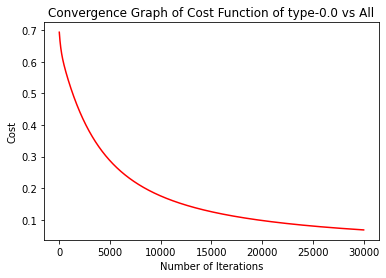

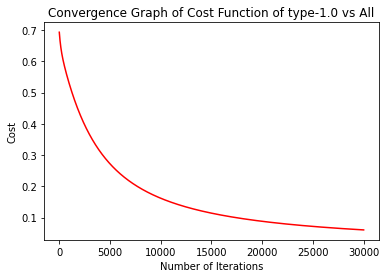

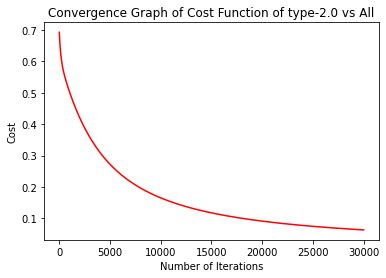

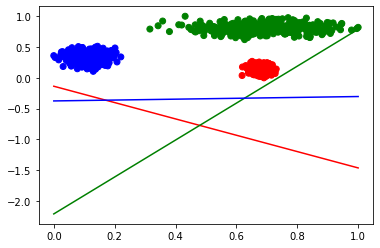

In [24]:
df = pd.read_csv('random_dataset.csv', header=None,dtype=str)
df.columns = ['1' , '2', 'Label']

X = df.drop('Label', axis = 1)
y = df['Label']

# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

X = np.array(X).astype(float)
normalize_dataset(X, dataset_minmax(X))
X = pd.DataFrame(X)

X_test = X.sample(int(len(X) * 0.3))
X_train = X.drop(X_test.index)

y_test = y[X_test.index]
y_train = y.drop(X_test.index)

X_test = X_test.reset_index().drop('index', axis = 1)
X_train = X_train.reset_index().drop('index', axis = 1)
y_test = y_test.reset_index().drop('index', axis = 1)
y_train = y_train.reset_index().drop('index', axis = 1)

print(len(X_test), len(y_test), len(X_train), len(y_train))


X_train = X_train.values
X_test = X_test.values
y_test = np.array(y_test)
y_train = np.array(y_train)

print(X_train.shape)

logi = LogisticRegression(n_iteration=30000).fit(X_train, y_train)
predition1 = logi.predict(X_test)
score1 = logi.score(X_test,y_test)
print("the accuracy of the model is ",score1)

logi._plot_cost(logi.cost) # Here we ae plotting the Cost value and showing how it is depreciating close to 0 with each iteration
logi.plot_points(X,y)

# Q 11

<h2>Question 11:</h2>
<p>Here we use logistic regression with l2 penalty to classify quality_test dataset.
For this classification since our data can not be classified with linearly, it was needed to increase the dimantion of the data. To do so we implimented a function to increase the Data to six degree and append all the foloowing degrees with the dataset. so Here we get from a dataset with 2 dim to a 27 dim data. we then classify the data using pyhton packages and plot the decision boundry of the dataset.</p>

In [29]:
df = pd.read_csv('quality_test.csv', header=None)
df.columns = ['1', '2', 'Label']

feature = df.drop('Label', axis = 1)
labels = df['Label']

(118, 27)


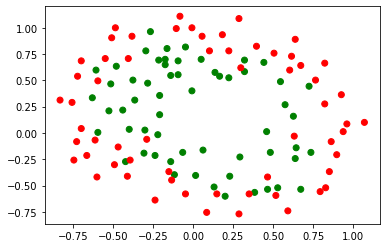

In [55]:
from numpy import power

def create_new_feature(x,y):
    return     [x, y,
               pow(x,2), x*y, pow(y,2),
               pow(x,3), pow(x,2)*y, x*pow(y,2), pow(y,3),
               pow(x,4), pow(x,3)*y, pow(x,2)*pow(y,2), x*pow(y,3), pow(y,4),
               pow(x,5), pow(x,4)*y, pow(x,3)*pow(y,2), pow(x,2)* pow(y,3), x*pow(y,4), pow(y,5),
               pow(x,6), pow(x,5)*y, pow(x,4)*pow(y,2), pow(x,3)* pow(y,3), pow(x,2)*pow(y,4), x*pow(y,5), pow(y,6)]

# print(feature)
feature_new = []
for i in range(len(feature)):
    x,y = feature.iloc[i,:]
    feature_new.append( create_new_feature(x, y) )

feature_new = np.array(feature_new)
print(feature_new.shape)

plt.figure()
plt.scatter(feature['1'], feature['2'], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [52]:
# define a function to plot the decision boundary
def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs

# define function to map higher order polynomial features
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res

              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82        60
         1.0       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



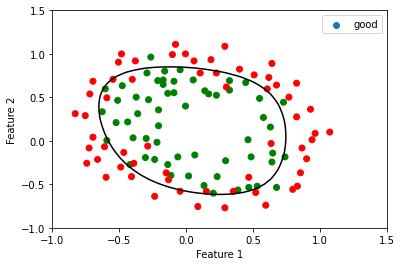

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


clf = LogisticRegression(random_state=0).fit(feature_new, labels)
y_pred = clf.predict(feature_new)

print(classification_report(labels, y_pred))

colors = ['red','green']


theta = list(clf.intercept_)
for i in clf.coef_[0] : 
    theta.append(i) 
    
# Plot Decision boundary
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.scatter(feature['1'], feature['2'], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plotDecisionBoundary(theta, 6, axes)

# Description

<p>As it was shown, the decision boundry and the points are shown in</p>

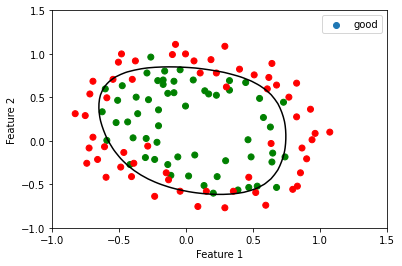

And Real Classes of our points are shown in:

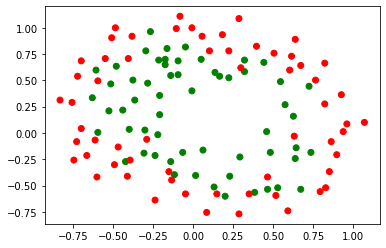

<p>Other Results are shown Above including accuracy and Scores